Group members:

1.Saman Dehestani

2.Sajede Fadaei

3.Aminreza Sefid

In [4]:
library(GEOquery)
library(limma)
library(umap)
library(pheatmap)
library(gplots)
library(ggplot2)
library(reshape2)
library(plyr)
library(repr)
library(gridExtra)
library(ggpubr)
library(Rtsne)
library(MASS)
library(NMF)

In [5]:
gset <- getGEO("GSE48558", GSEMatrix =TRUE, getGPL=T, destdir='../Data/')
gset <- gset[[1]]

Found 1 file(s)

GSE48558_series_matrix.txt.gz

Using locally cached version: ../Data//GSE48558_series_matrix.txt.gz

Using locally cached version of GPL6244 found here:
../Data//GPL6244.soft.gz 



In [6]:
gsms <- paste0("0000000000000XXXXXXXXXXXXXXXXXXXXXXXXXXX1XXX1XXXXX",
               "XXXXXXXXXXXXXXXXXX2X3XXX1X1442X3XX33XX33X2X3X2X3X5",
               "XXX5XXX5XXXXXXXXXXXXXXXXXXXXXXXXXXXXX1111111003000",
               "22222223444413333333")
sml <- strsplit(gsms, split="")[[1]]
sel <- which(sml != "X")
sml <- sml[sel]
gset <- gset[ ,sel]

In [7]:
gs <- factor(sml)
groups <- make.names(c("AML","Granulocytes","B Cells","T Cells","Monocytes","CD34"))
levels(gs) <- groups
gset$group <- gs

In [8]:
ex <- exprs(gset)
print(min(ex))
print(max(ex))

[1] 1.611473
[1] 13.76154


Question 2)

According to the plot min value is 1.6 and max value is 13.76, so they are logarithmic already and data is normalized so normalization is not necessary.

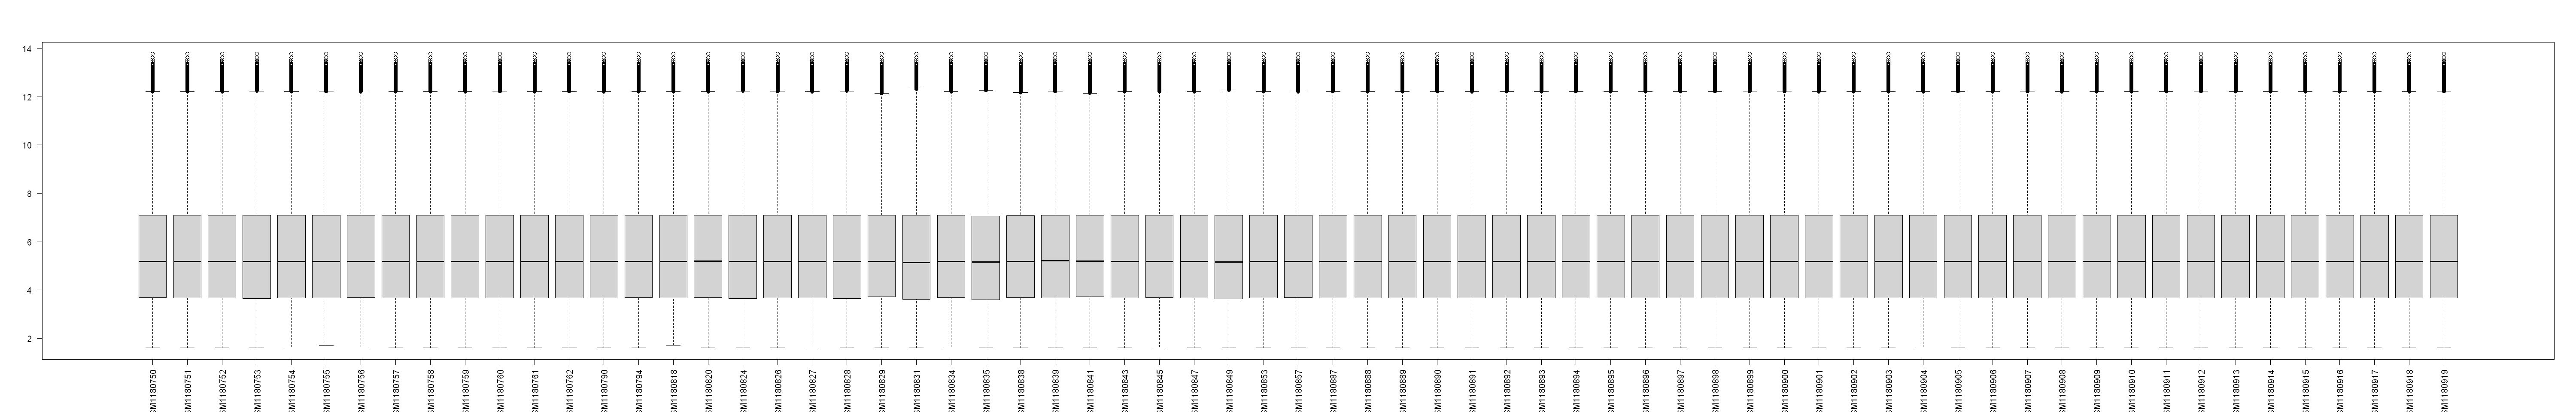

In [9]:
options(repr.plot.width=50, repr.plot.height=8)
boxplot(ex, las = 2)


Question 4)

Heat map shows correlations between different samples, for example each sample has high corealation with itself that is determined with red color or granulocytes have low corelation between B-cells and T-celss that is determined with blue


According to the heatmap AML has high corolation with CD34,Monocytes

what is neccesecity?

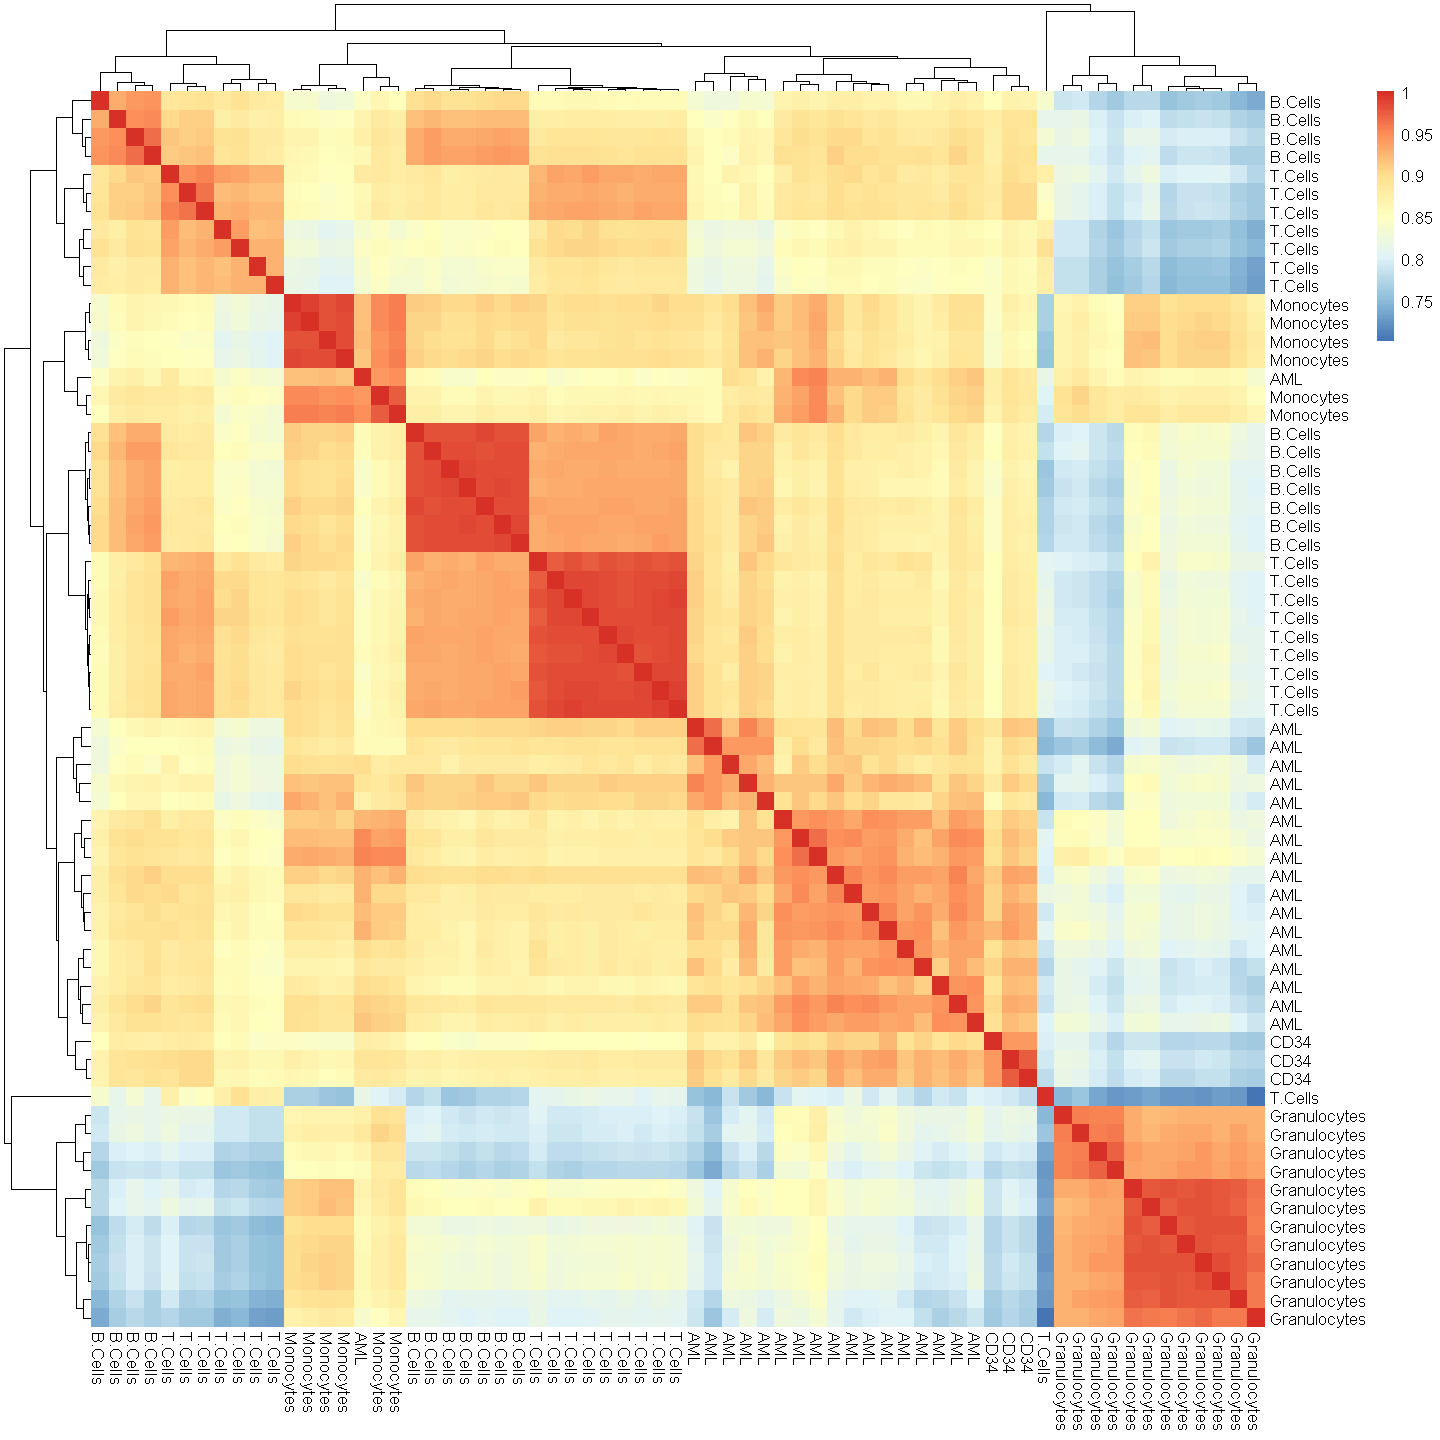

In [10]:
options(repr.plot.width=12, repr.plot.height=12)
pheatmap(cor(ex),
         labels_row = gs,
         labels_col = gs,
         border_color = NA,)

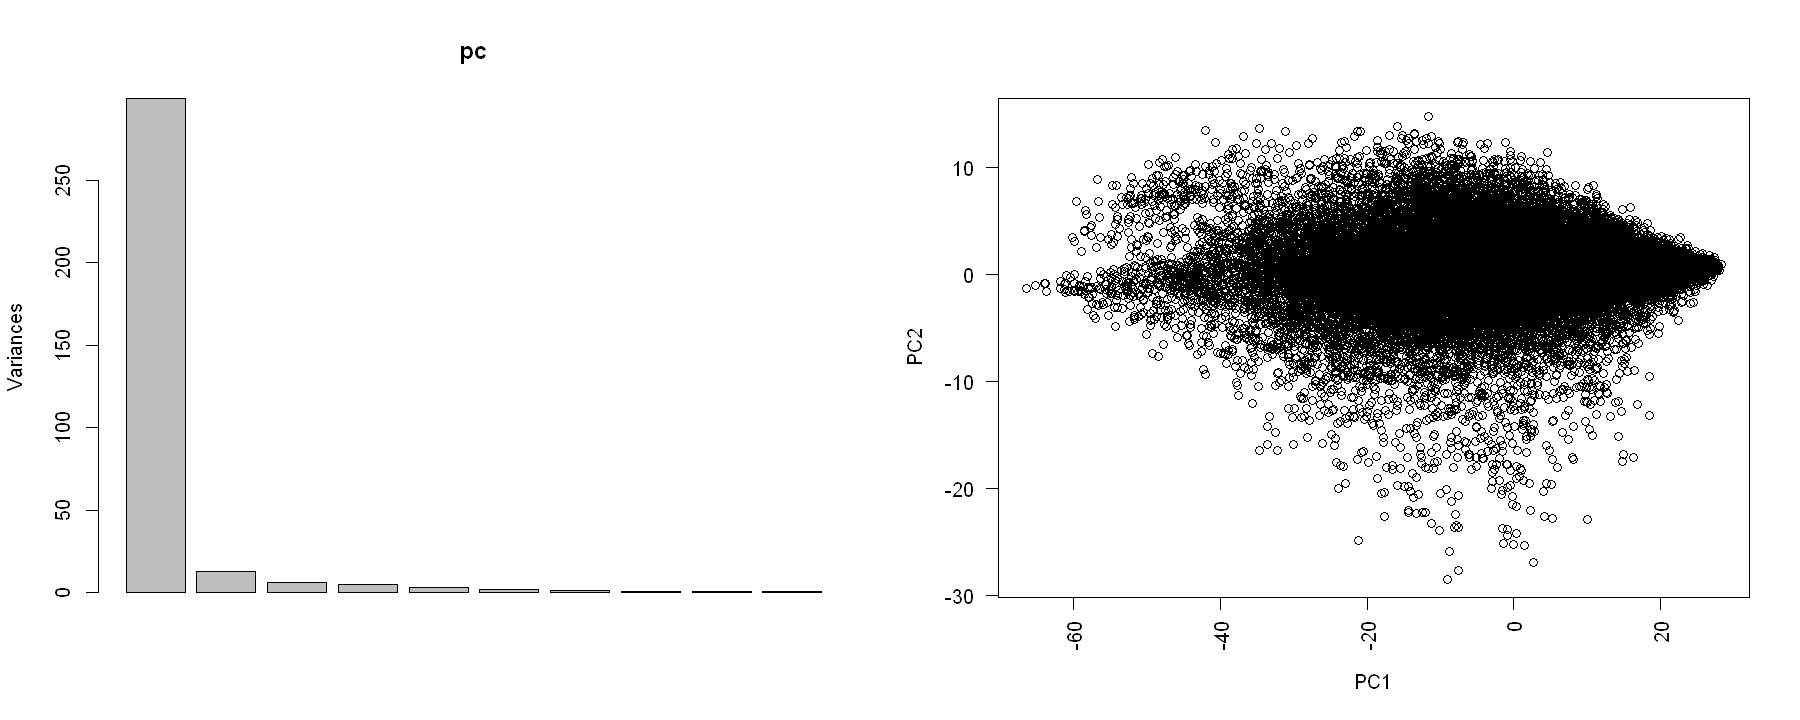

In [11]:
pc <- prcomp(ex)
options(repr.plot.width=15, repr.plot.height=6)
par(mfrow = c(1, 2))
p1 <- plot(pc)
p2 <- plot(pc$x[, 1:2], las = 2)

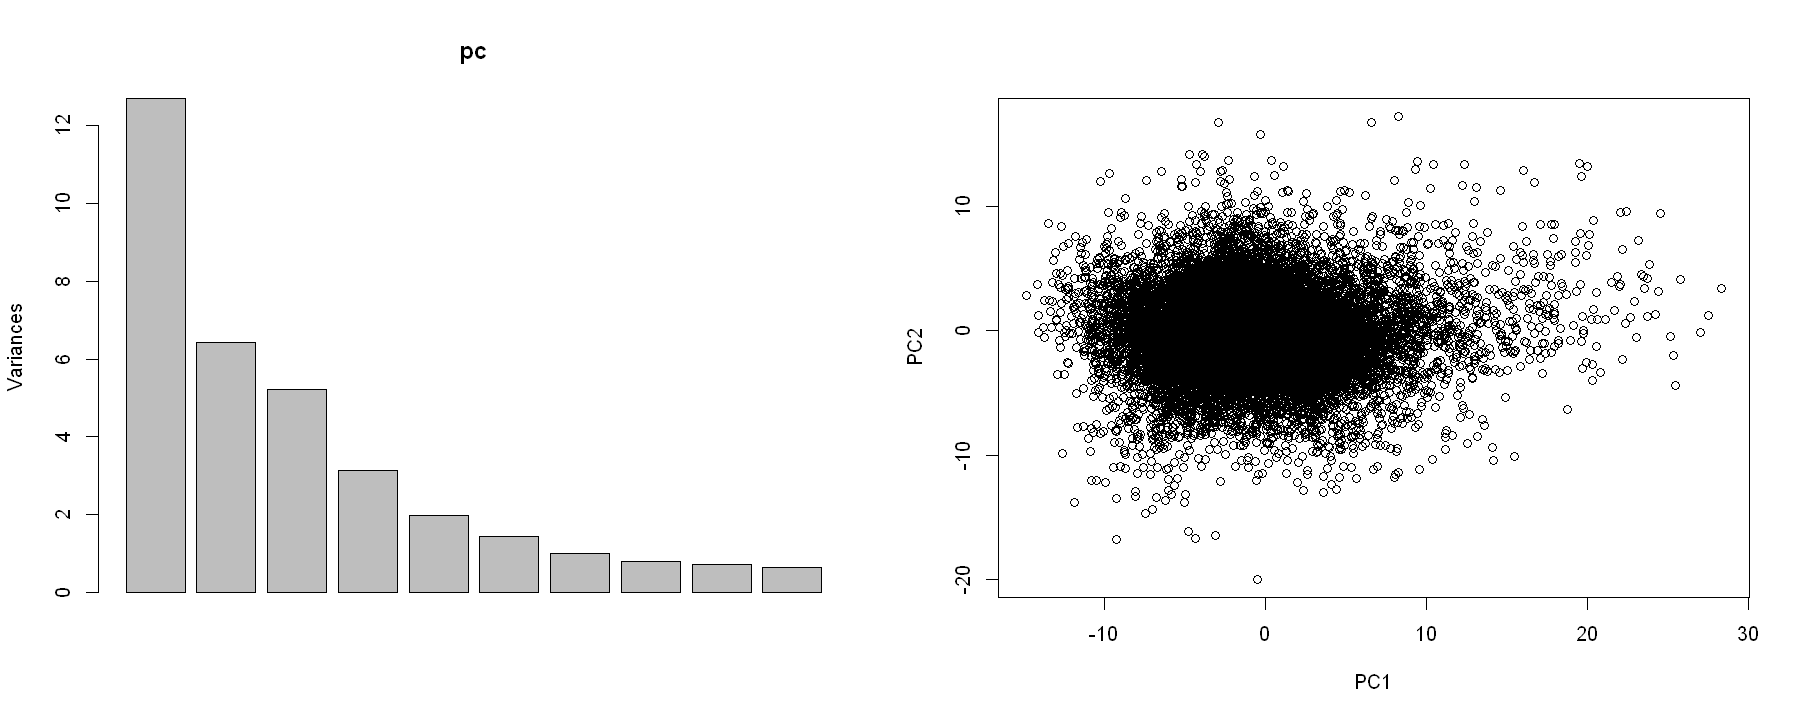

In [12]:
ex.scale <- t(scale(t(ex), scale = F))
pc <- prcomp(ex.scale)

options(repr.plot.width=15, repr.plot.height=6)
par(mfrow = c(1, 2))
plot(pc)
plot(pc$x[, 1:2]) # x column are genes (so each point in this plot represents a gene)

Question 3)

Dimension reduction can visualize data so we can determine if we performed well on experiment or not.

we analysed PCA,tSNE and FA

Best dimension reduction method is tSNE which has most discriminative clustering of samples.

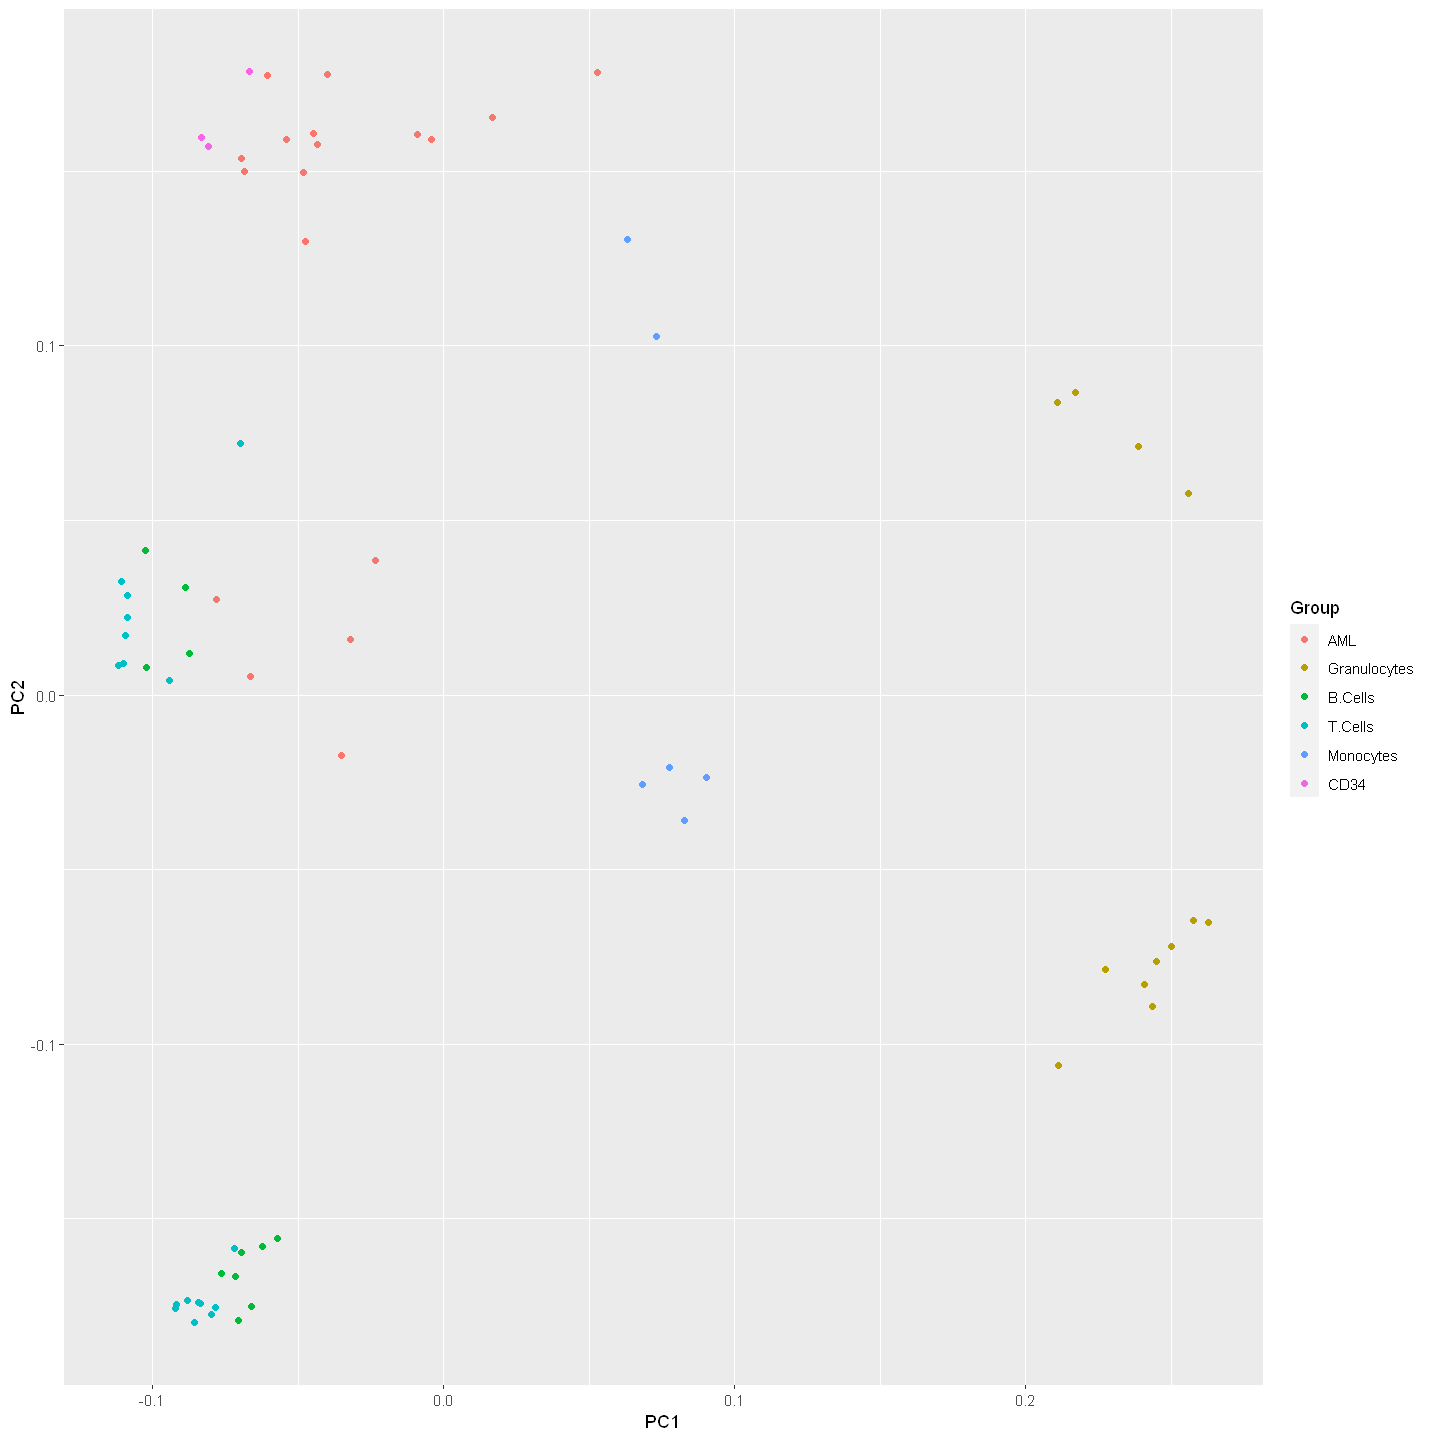

In [13]:
pcr <- data.frame(pc$rotation[, 1:3], Group=gs)
options(repr.plot.width=12, repr.plot.height=12)
ggplot(pcr, aes(x = PC1, y = PC2, color = Group)) + geom_point() + theme_gray()

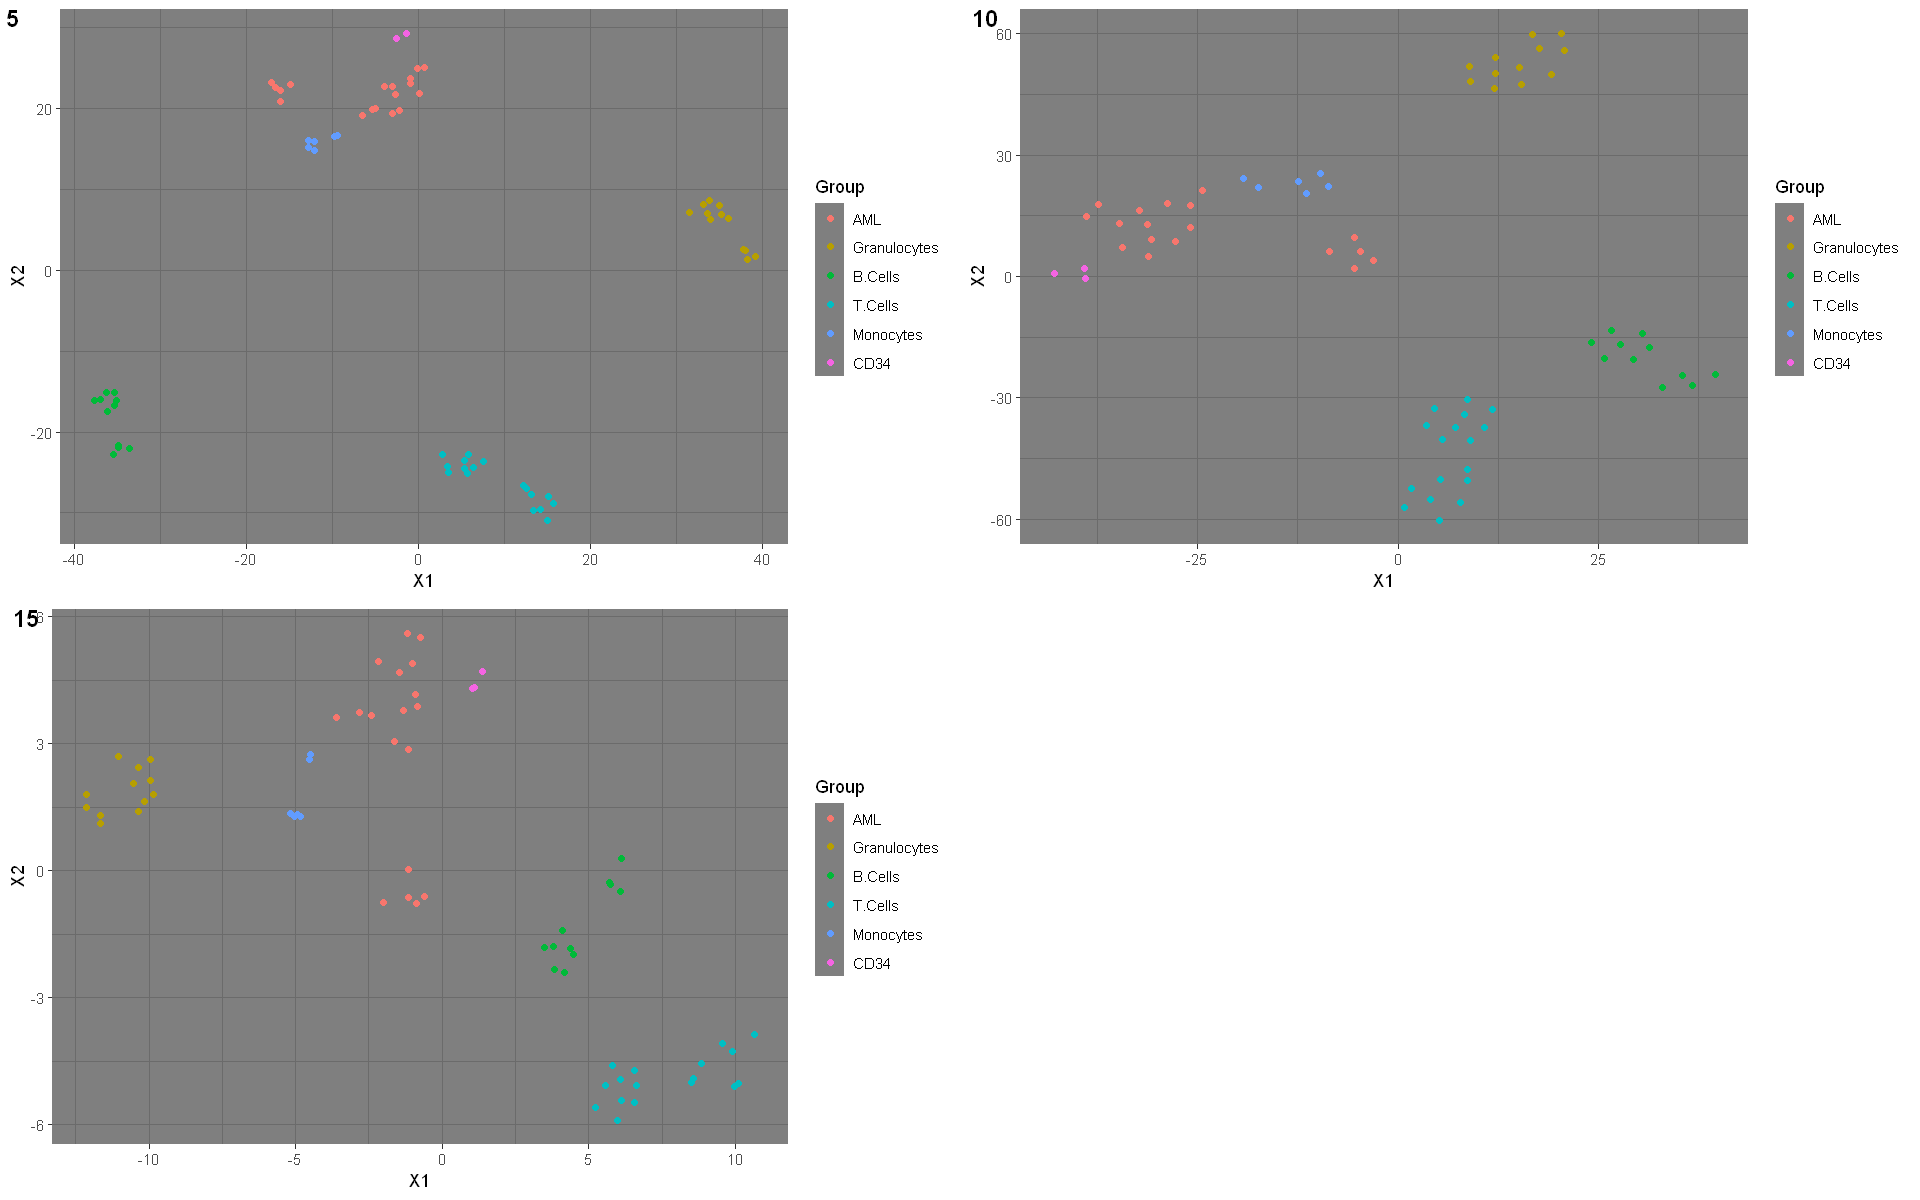

In [14]:
tsne_results <- list(Rtsne(t(ex), perplexity=5, check_duplicates = FALSE),
                     Rtsne(t(ex), perplexity=10, check_duplicates = FALSE),
                     Rtsne(t(ex), perplexity=15, check_duplicates = FALSE))

options(repr.plot.width=16, repr.plot.height=10)
plots.list <- list()

for(i in seq_along(tsne_results)) {
  tsne <- data.frame(tsne_results[[i]]$Y[, 1:2], Group=gs)
  plots.list[[i]] <- ggplot(tsne, aes(X1, X2, color = Group)) + geom_point() + theme_dark()
}
ggarrange(plotlist = plots.list,
          ncol = 2,
          nrow = 2,
          labels = c(5, 10, 15))


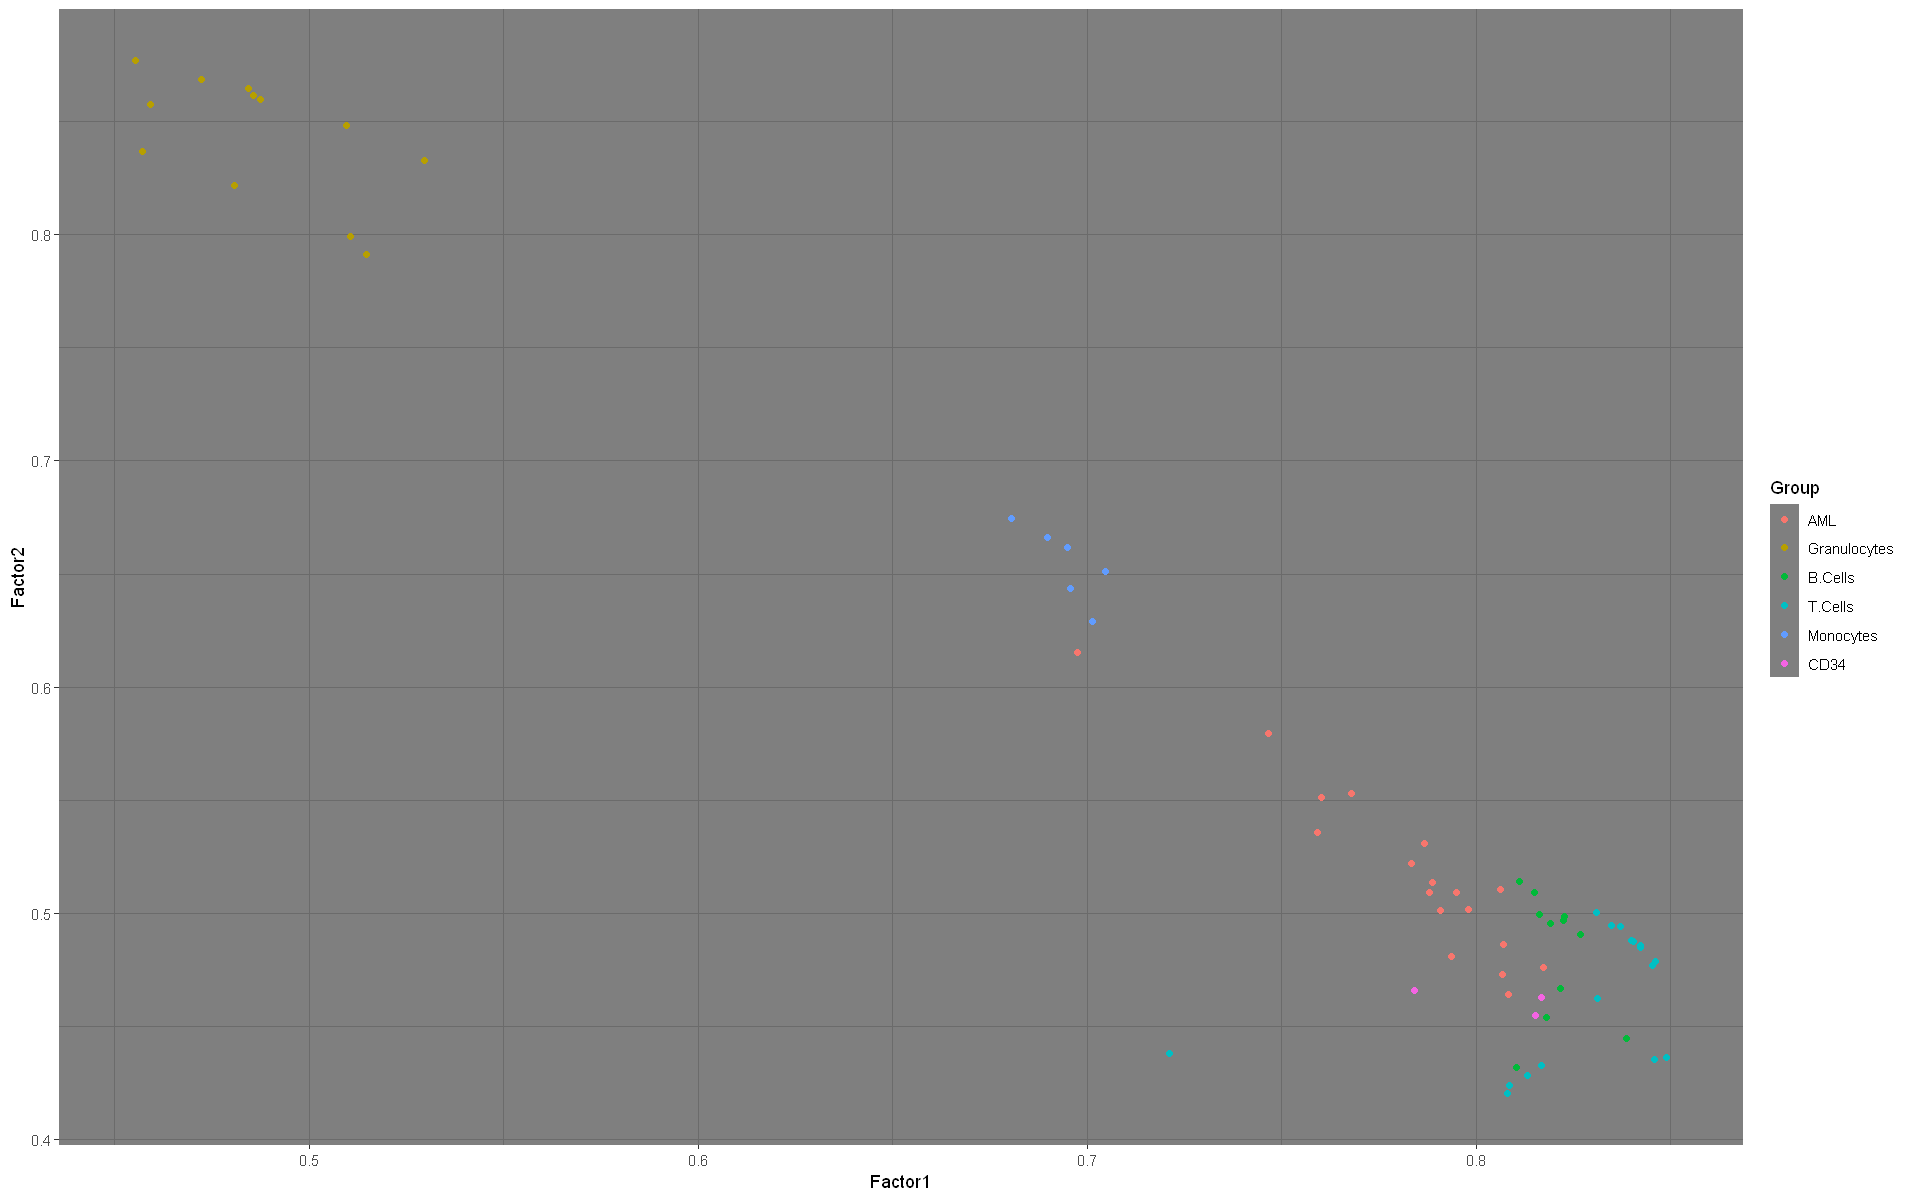

In [26]:
fa_result <- factanal(ex, factors = 2)
fa_df <- data.frame(fa_result$loadings[,1:2], Group=gs)
ggplot(fa_df, aes(Factor1,Factor2, color = Group)) + geom_point() + theme_dark()

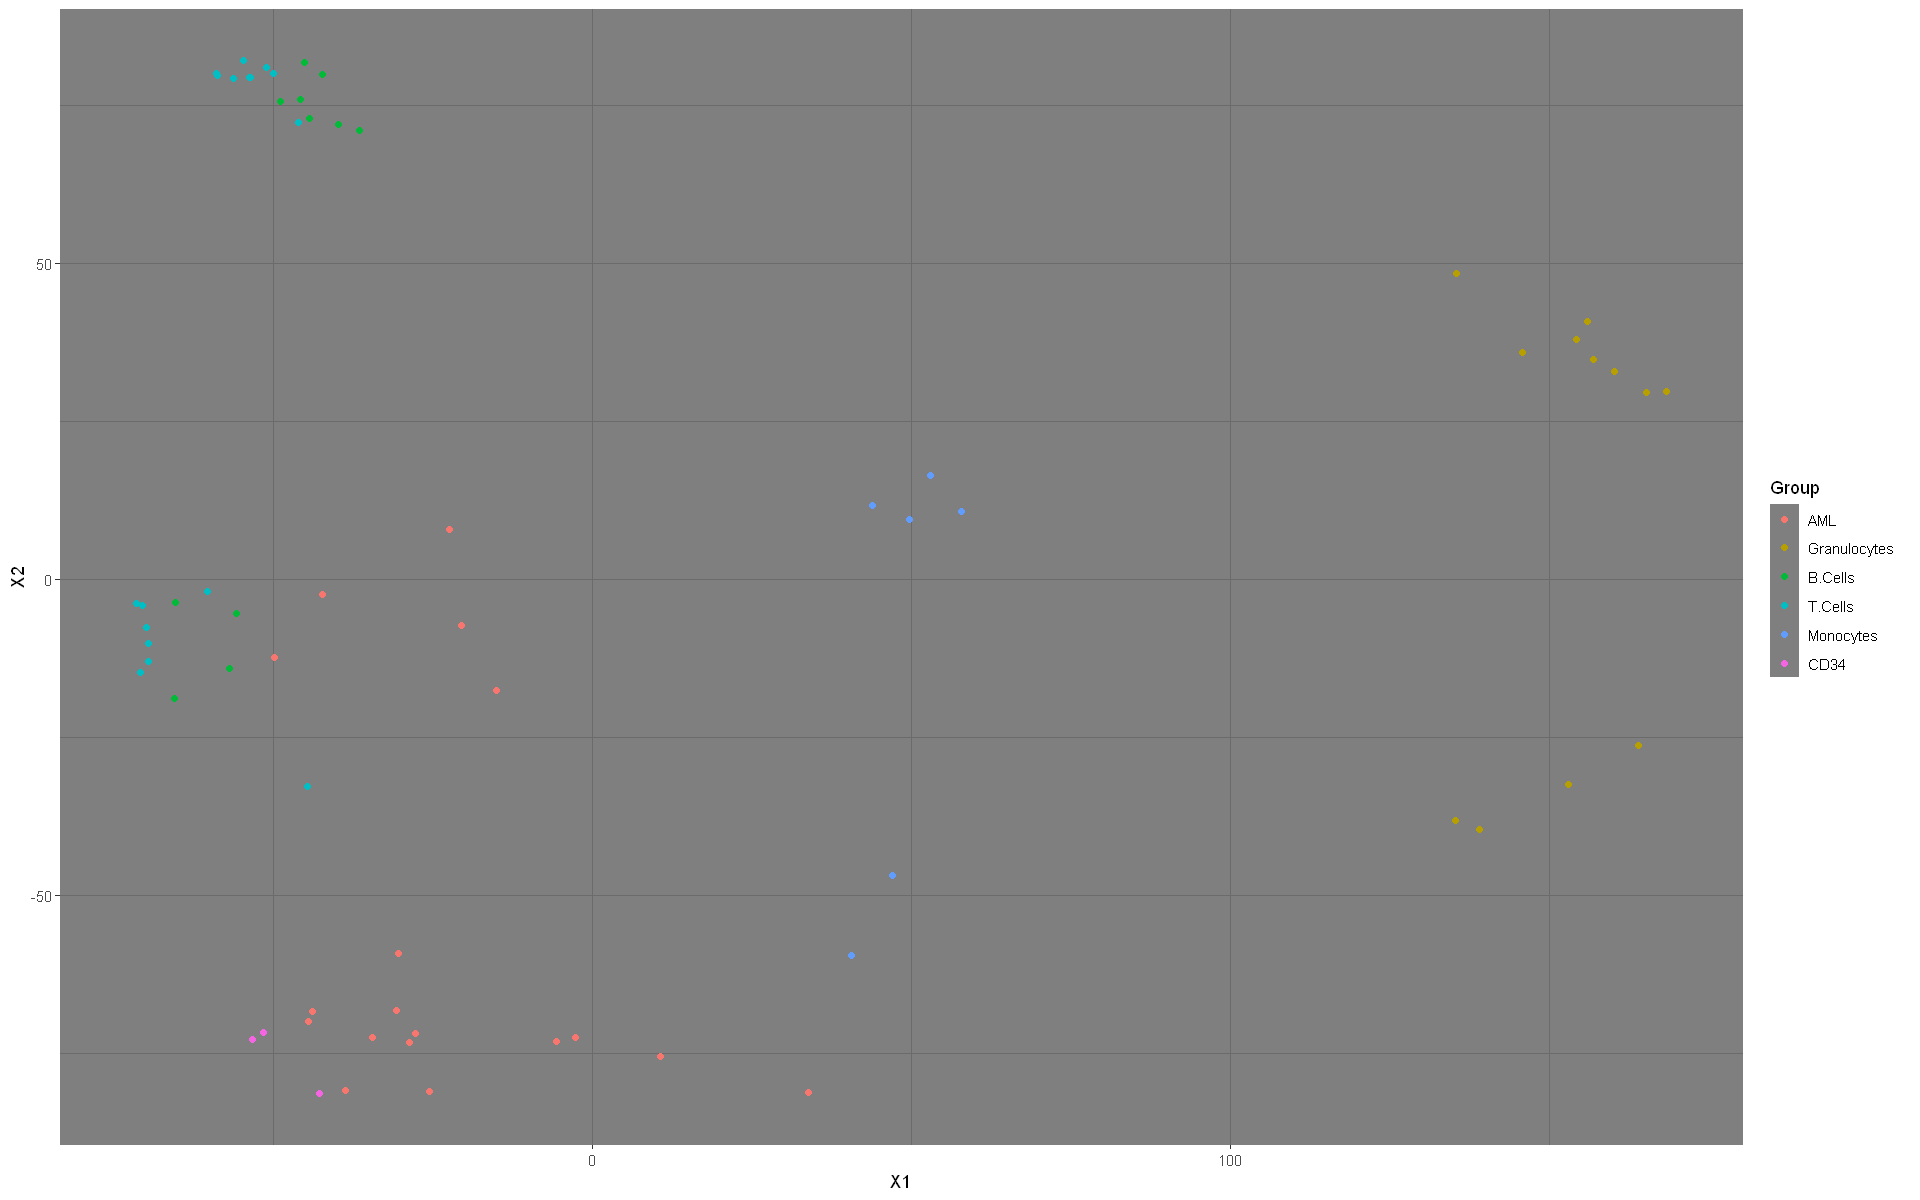

In [25]:
ex_dist <- dist(t(ex.scale))
mds_result <- cmdscale(ex_dist,eig=TRUE, k=2)
mds_df <- data.frame(mds_result$points[,1:2], Group=gs)
ggplot(mds_df, aes(X1,X2, color = Group)) + geom_point() + theme_dark()